### This is just a review of the ideas that I learned during Data Analysis with Python

#### For this purpose, I am going to use the data: automobile_data

### Part 1: Data-Wrangling

In [1]:
# importing all necessary modules
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
mydata = pd.read_csv('raw_automobile_data.csv')

In [4]:
mydata.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [5]:
mydata.columns

Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [6]:
df=mydata.drop(['Unnamed: 0'], axis = 1)

In [8]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Identify and handle missing values

#### Using NaN for: '?' and blank

In [9]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True) 
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


#### Checking for missing values:

In [10]:
missing_data = df.isnull() 
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Count missing values in each column

In [12]:
for column in missing_data.columns.values.tolist(): 
    print(column)
    print (missing_data[column].value_counts()) 
    print(' ')

symboling
False    205
Name: symboling, dtype: int64
 
normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64
 
make
False    205
Name: make, dtype: int64
 
fuel-type
False    205
Name: fuel-type, dtype: int64
 
aspiration
False    205
Name: aspiration, dtype: int64
 
num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64
 
body-style
False    205
Name: body-style, dtype: int64
 
drive-wheels
False    205
Name: drive-wheels, dtype: int64
 
engine-location
False    205
Name: engine-location, dtype: int64
 
wheel-base
False    205
Name: wheel-base, dtype: int64
 
length
False    205
Name: length, dtype: int64
 
width
False    205
Name: width, dtype: int64
 
height
False    205
Name: height, dtype: int64
 
curb-weight
False    205
Name: curb-weight, dtype: int64
 
engine-type
False    205
Name: engine-type, dtype: int64
 
num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64
 
engine-size
False    205
Name: engine-size, dtype: int64

We see that there are missing values as follows
- There are 41 missing values in normalized-losses
- There are 2 missing values in num-of-doors
- There are 4 missing values in bore
- There are 4 missing values in stroke
- There are 2 missing values in horsepower
- There are 2 missing values in peak-rpm
- There are 4 missing values in price

#### Deal with missing data
How to deal with missing data? What can we do?
 1. drop data
    - drop the whole row
    - drop the whole column
 2. replace data
    - replace it by mean
    - replace it by frequency
    - replace it based on other functions

### Idea:

#### Here we want to predict car price. So can do the following:

##### Replace by mean for the numeric columns
- "normalized-losses": 41 missing data, replace them with mean 
- "stroke": 4 missing data, replace them with mean
- "bore": 4 missing data, replace them with mean
- "horsepower": 2 missing data, replace them with mean 
- "peak-rpm": 2 missing data, replace them with mean

##### Replace by highest frequency for categorical column (replace by mostly repeated item)
- "num-of-doors": 2 missing data, replace them with "four". Since four doors is most frequent, it is most likely to occur

##### Drop the whole row for the column to be predicted (do not use approximated values)
 - "price": 4 missing data, simply delete the whole row


#### Calculate the average of the column and Replace "NaN" by mean value in the column



#### "normalized-losses"


In [13]:
avg_norm_loss = df['normalized-losses'].astype("float").mean() 
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [14]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

#### "bore"

In [15]:
avg_bore = df['bore'].astype('float').mean()
avg_bore

3.3297512437810957

In [16]:
df['bore'].replace(np.nan, avg_bore, inplace = True)

#### "stroke"

In [17]:
avg_stroke =df['stroke'].astype('float').mean()
avg_stroke

3.2554228855721337

In [18]:
df['stroke'].replace(np.nan, avg_stroke, inplace = True)

#### "horsepower"

In [19]:
avg_horsepower = df['horsepower'].mean()
avg_horsepower

104.25615763546799

In [20]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace = True)

#### "peak-rpm"

In [21]:
avg_peak_rpm = df['peak-rpm'].mean()
avg_peak_rpm

5125.369458128079

In [22]:
df['peak-rpm'].replace(np.nan, avg_peak_rpm, inplace= True)

#### "num-of-doors"

In [23]:
df['num-of-doors'].replace(np.nan, "four", inplace = True)

#### Price: dropping all rows of price with nan values

In [24]:
#simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True) 

In [25]:
# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [26]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [28]:
df.to_csv("automobile.csv")

### Correcting data format

#### Lets list the data types for each column

In [29]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

##### 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.


#### Changing data format

In [30]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float") 
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int") 
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [31]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Data Standardization

Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison

In [32]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"] 

# check your transformed data
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556


### Data Normalization
Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1

In [33]:
# Normalizing columns "length", "width" and "height"
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max() 
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

In [34]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556


### Binning
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?

We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins


In [35]:
### Creating Bins
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4) 
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [36]:
# naming bins
group_names = ['Low', 'Medium', 'High']

In [37]:
# Changing Data type
df["horsepower"]=df["horsepower"].astype(int, copy=True)

In [38]:
# Putting into bins
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [39]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

#### Bar chart

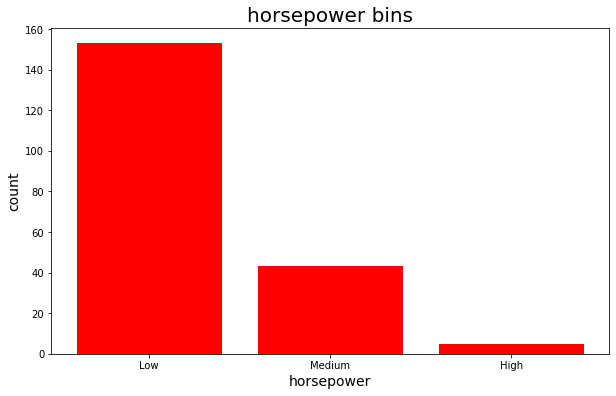

In [40]:
plt.figure(figsize=(10,6))
plt.bar(group_names, df["horsepower-binned"].value_counts(), color = 'r')
plt.xlabel("horsepower", fontsize = 14) 
plt.ylabel("count", fontsize = 14) 
plt.title("horsepower bins", fontsize = 20)
plt.show()

#### Histogram

Text(0.5, 1.0, 'horsepower bins')

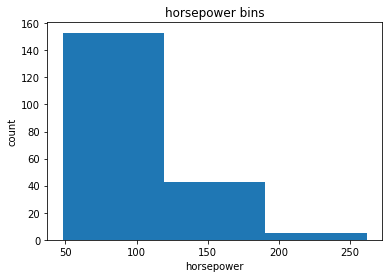

In [41]:
# draw historgram of attribute "horsepower" with bins = 3
plt.hist(df["horsepower"], bins = 3)
plt.xlabel("horsepower") 
plt.ylabel("count") 
plt.title("horsepower bins")

#### Indicator variable (or dummy variable)
An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

We can use categorical variables for regression analysis in the later modules. For example, We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables 0 and 1.


Get indicator variables and assign it to data frame "dummy_variable_1"

In [42]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"]) 
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [43]:
#change column names for clarity
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [44]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,Low


### Part 2: Exploratory-Data-Analysis

#### How to choose the right visualization method?
When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.

Also, we can calculate the correlation between variables of type "int64" or "float64" using the method "corr":


In [45]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,0.066171
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,0.238567
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.476153
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.657373
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.003811
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.785353
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.745059
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.554610
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,-0.034636,0.082269,0.036133


### Regression Plot:
In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.

Let's find the scatterplot of "engine-size" and "price"

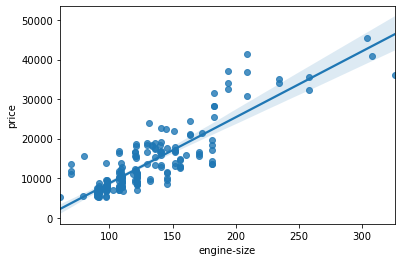

In [46]:
#Engine size as potential predictor variable of price
sns.regplot(x = "engine-size", y ="price", data=df)
plt.show()

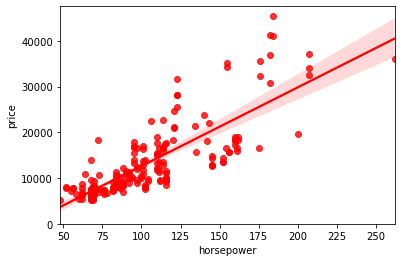

In [47]:
# Engine size as potential predictor variable of price
sns.regplot(x="horsepower", y="price", data=df, color ='r') 
plt.ylim(0,)
plt.show()

We can examine the correlation between 'engine-size', 'horsepower, and 'price' and see:

In [48]:
df[["engine-size", "horsepower", "price"]].corr()

,engine-size,horsepower,price
engine-size,1.000000,0.822668,0.872335
horsepower,0.822668,1.000000,0.809607
price,0.872335,0.809607,1.000000


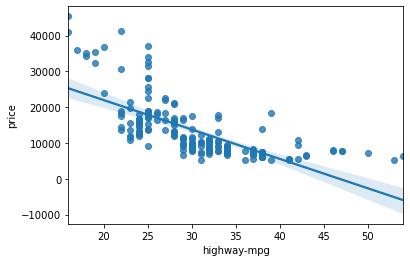

In [49]:
sns.regplot(x="highway-mpg", y="price", data=df)

#### Categorical variables


The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

Let's look at the relationship between "body-style" and "price".

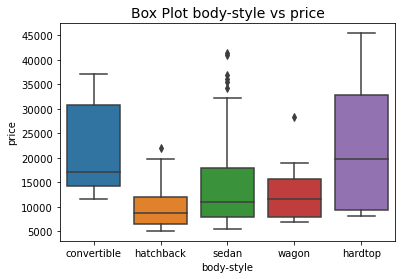

In [50]:
#relationship between "body-style" and "price".
sns.boxplot(x="body-style", y="price", data=df)
plt.title('Box Plot body-style vs price', fontsize = 14)
plt.show()

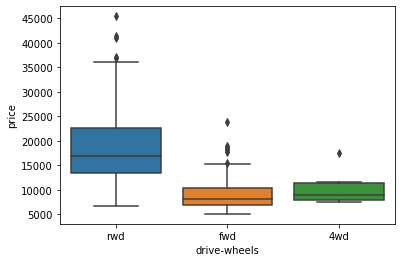

In [51]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

### Descriptive Statistical Analysis
The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

In [52]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353,9.944145
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342,2.534599
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923


### Value Counts
Value-counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column 'drive-wheels'.

In [53]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [54]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [55]:
df['engine-location'].value_counts().to_frame()

,engine-location
front,198
rear,3


### Grouping
The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.


In [56]:
# getting category
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [57]:
df_group = df[['drive-wheels','body-style','price']]
df_group.head()

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0


We can then calculate the average price for each of the different categories of data.

In [58]:
#Grouping by drive-wheels:
df_group_mean1 = df_group.groupby(['drive-wheels'],as_index=False).mean() 
df_group_mean1

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [59]:
#Grouping by body-style:
df_group_mean2 = df_group.groupby(['body-style'],as_index=False).mean()
df_group_mean2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

In [60]:
# grouping by more than 1 variable
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False). mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


### Heat Map: Variables: Drive Wheels and Body Style vs Price

#### Pivot Table

In [61]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels', columns='body-style') 
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [62]:
# fill NaN by 0
#fill missing values with 0 in grouped_pivot
grouped_pivot = grouped_pivot.fillna(0) 
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

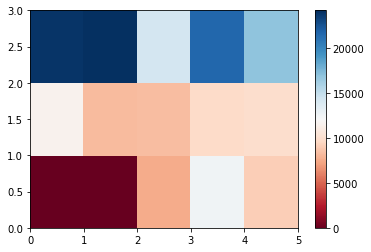

In [63]:
plt.pcolor(grouped_pivot, cmap='RdBu') 
plt.colorbar()
plt.show()

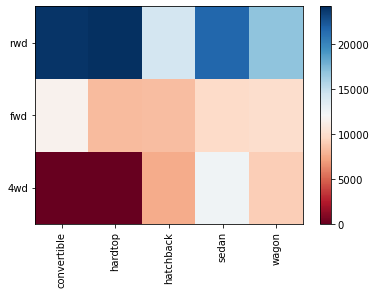

In [64]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1] 
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False) 
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False) 
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90) 
fig.colorbar(im)
plt.show()

The main question we want to answer in this module, is "What are the main characteristics which have the most impact on the car price?".

To get a better measure of the important characteristics, we look at the correlation of these variables with the car price, in other words: how is the car price dependent on this variable?

### Correlation and Causation

In [65]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,0.066171
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,0.238567
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.476153
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.657373
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.003811
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.785353
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.745059
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.554610
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,-0.034636,0.082269,0.036133


sometimes we would like to know the significant of the correlation estimate

By convention, when the

- p-value is < 0.001: we say there is strong evidence that the correlation is significant. 
- p-value is < 0.05: there is moderate evidence that the correlation is significant. 
- p-value is < 0.1: there is weak evidence that the correlation is significant.
- p-value is > 0.1: there is no evidence that the correlation is significant.

We can obtain this information using "stats" module in the "scipy" library.


In [66]:
from scipy import stats

#### wheel-base VS price

In [67]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


#### Conclusion:
Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)


#### horsepower VS price

In [68]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
pearson_coef, p_value

(0.8096068016571054, 6.273536270650504e-48)

#### Conclusion:
Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)


#### Length vs Price

In [69]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
pearson_coef, p_value

(0.6906283804483639, 8.016477466159328e-30)

#### Conclusion:
Since the p-value is < 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).


#### Width vs Price


In [70]:

pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
pearson_coef, p_value 

(0.7512653440522673, 9.200335510481646e-38)

#### Conclusion:
Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).


#### Curb-weight vs Price

In [71]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
pearson_coef, p_value

(0.8344145257702844, 2.189577238893878e-53)

#### Conclusion:
Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

#### Engine-size vs Price

In [72]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
pearson_coef, p_value

(0.8723351674455185, 9.265491622198389e-64)

#### Conclusion:
Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).


#### Bore vs Price

In [73]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
pearson_coef, p_value

(0.5431553832626602, 8.049189483935489e-17)

#### Conclusion:
Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).


#### City-mpg vs Price

In [74]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
pearson_coef, p_value

(-0.6865710067844678, 2.321132065567641e-29)

#### Conclusion:
Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.


#### Highway-mpg vs Price

In [75]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
pearson_coef, p_value

(-0.704692265058953, 1.7495471144476358e-31)

#### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.


### ANOVA: Analysis of Variance
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant is our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return asizeable F-test score and a small p-value.

#### Drive Wheels
Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

Let's see if different types 'drive-wheels' impact 'price', we group the data.


In [76]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels']) 
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


We can obtain the values of the method group using the method "get_group".

In [77]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [78]:
#ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


#### fwd and rwd

In [79]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


#### 4wd and rwd

In [80]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


#### 4wd and fwd

In [81]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])
print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


#### Conclusion: Important Variables
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:
 - Length
 - Width 
 - Curb-weight 
 - Engine-size 
 - Horsepower 
 - City-mpg 
 - Highway-mpg 
 - Wheel-base 
 - Bore
 
Categorical variables: 
 - Drive-wheels

### Part 3: Model Development 

We are working with the data:

In [82]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400.0,23,28,16845.0,10.217391,Low
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300.0,19,25,19045.0,12.368421,Medium
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500.0,18,23,21485.0,13.055556,Medium
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800.0,26,27,22470.0,9.038462,Low


#### Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lm = LinearRegression()
lm

LinearRegression()

In [85]:
X = df[['highway-mpg']] 
Y = df['price']

In [86]:
lm.fit(X,Y)

LinearRegression()

In [87]:
Yhat=lm.predict(X) 
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [88]:
# y- intercept
lm.intercept_

38423.305858157415

In [89]:
# slope
lm.coef_

array([-821.73337832])

#### linear model
price = 38423.31 - 821.73 x highway-mpg


#### Multiple Linear Regression

From the previous section we know that other good predictors of price could be:
 - Horsepower 
 - Curb-weight 
 - Engine-size 
 - Highway-mpg
 
Let's develop a model using these variables as the predictor variables.


In [90]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [91]:
# Fit the linear model using the four above-mentioned variables.
lm.fit(Z, df['price'])

LinearRegression()

In [92]:
# intercept
lm.intercept_

-15811.863767729246

In [93]:
# coefficients(slope)
lm.coef_

array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ])

#### linear model
Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg


#### Model Evaluation using Visualization

##### Regression Plot

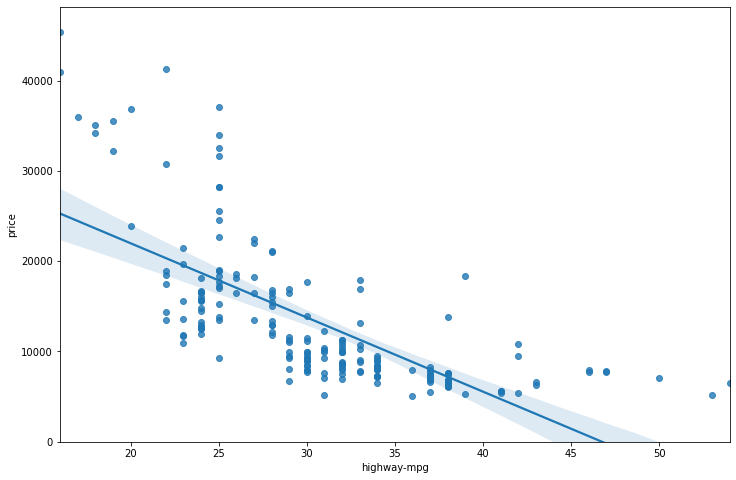

In [94]:
import seaborn as sns 
%matplotlib inline
plt.figure(figsize=(12, 8)) 
sns.regplot(x="highway-mpg", y="price", data=df) 
plt.ylim(0,)
plt.show()

We can see from this plot that price is negatively correlated to highway-mpg,

(0.0, 47414.1)

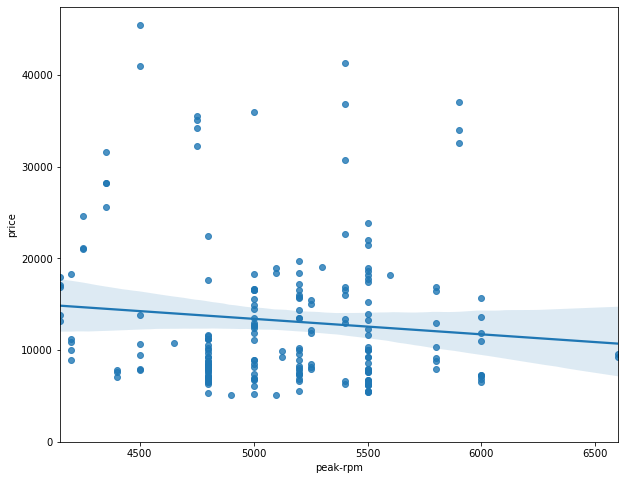

In [95]:
plt.figure(figsize=(10, 8)) 
sns.regplot(x="peak-rpm", y="price", data=df) 
plt.ylim(0,)

#### Residual Plot

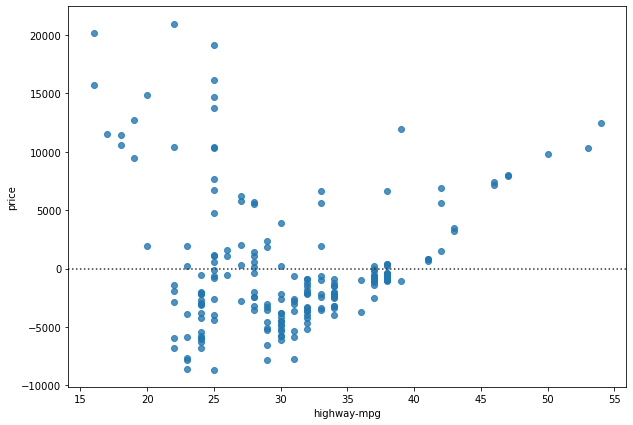

In [96]:
plt.figure(figsize=(10, 7)) 
sns.residplot(df['highway-mpg'], df['price']) 
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

#### Multiple Linear Regression
How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.
One way to look at the fit of the model is by looking at the distribution plot:
##### Distribution plot:
We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.


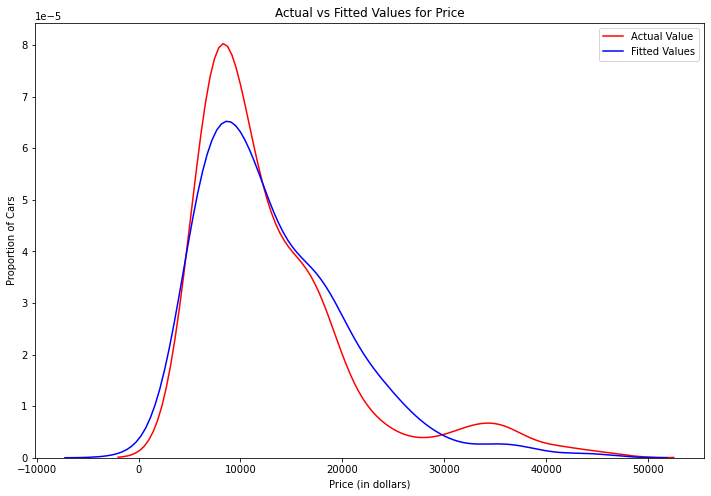

In [97]:
Y_hat = lm.predict(Z)
plt.figure(figsize=(12, 8))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
ax1 = sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('Price (in dollars)') 
plt.ylabel('Proportion of Cars')
plt.show() 
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.


#### Polynomial Regression and Pipelines

#### Polynomial Regression

We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

We will use the following function to plot the data:


In [98]:
def PlotPolly(model, independent_variable, dependent_variabble, Name): 
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-') 
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf() 
    plt.xlabel(Name) 
    plt.ylabel('Price of Cars')
    plt.show() 
    plt.close()

In [99]:
x = df['highway-mpg'] 
y = df['price']

In [100]:
# Here we use a polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 3) 
p = np.poly1d(f) 
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


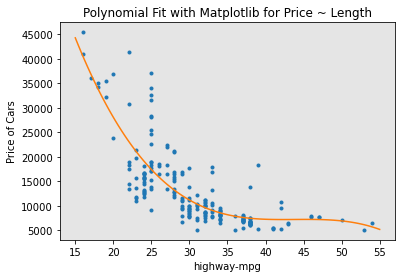

In [101]:
PlotPolly(p, x, y, 'highway-mpg')

In [102]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

#### Pipeline
Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline.

We also use StandardScaler as a step in our pipeline.

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [104]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [105]:
pipe=Pipeline(Input) 
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [106]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [107]:
ypipe=pipe.predict(Z) 
ypipe[0:4]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

#### Measures for In-Sample Evaluation

Two very important measures that are often used in Statistics to determine the accuracy of a model are:
 - $R^2$ or R-squared
 - Mean Squared Error (MSE)

##### Model 1: Simple Linear Regression

In [108]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [109]:
Yhat=lm.predict(X)

In [110]:
from sklearn.metrics import mean_squared_error

In [111]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


#### Model 2: Multiple Linear Regression


In [112]:
# fit the model
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093732522175299


In [113]:
Y_predict_multifit = lm.predict(Z)

In [114]:
MSE = mean_squared_error(df['price'], Y_predict_multifit)
MSE

11979300.349818882

#### Model 3: Polynomial Fit

In [115]:
from sklearn.metrics import r2_score

In [116]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [117]:
MSE = mean_squared_error(df['price'], p(x))
MSE

20474146.426361218

#### Decision Making: Determining a Good Model Fit

Let's take a look at the values for the different models.

#### Simple Linear Regression: 
Using Highway-mpg as a Predictor Variable of Price.
 - R-squared: 0.49659118843391759 
 - MSE: 3.16 x $10^7$

#### Multiple Linear Regression: 
Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
 - R-squared: 0.80896354913783497 
 - MSE: 1.2 x $10^7$

#### Polynomial Fit: 
Using Highway-mpg as a Predictor Variable of Price.
 - R-squared: 0.6741946663906514 
 - MSE: 2.05 x $10^7$

#### Conclusion:
Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.

### Prediction 

We have

In [118]:
Y_hat = lm.predict(Z)

In [119]:
Z

,horsepower,curb-weight,engine-size,highway-mpg
0,111,2548,130,27
1,111,2548,130,27
2,154,2823,152,26
3,102,2337,109,30
4,115,2824,136,22
...,...,...,...,...
196,114,2952,141,28
197,160,3049,141,25
198,134,3012,173,23
199,106,3217,145,27


In [120]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400.0,23,28,16845.0,10.217391,Low
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300.0,19,25,19045.0,12.368421,Medium
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500.0,18,23,21485.0,13.055556,Medium
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800.0,26,27,22470.0,9.038462,Low


In [120]:
Y_hat[0:5] #first five prices

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344])

In [121]:
Y_hat[198:201] # last three prices

array([20475.22145759, 17803.80500849, 17103.9287056 ])